<h3>Exercise


'carprices.csv' file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

> 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

> 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

> 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [53]:
df = pd.read_csv('carprices_OHE.csv')
df

,Model,Mileage,Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


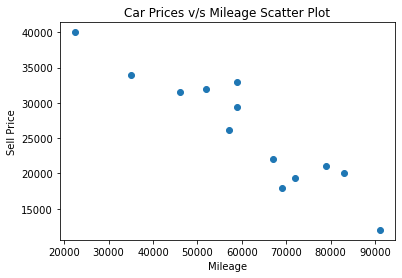

In [54]:
%matplotlib inline
plt.scatter(df['Mileage'], df['Price'])
plt.title('Car Prices v/s Mileage Scatter Plot')
plt.xlabel('Mileage')
plt.ylabel('Sell Price')
plt.show()

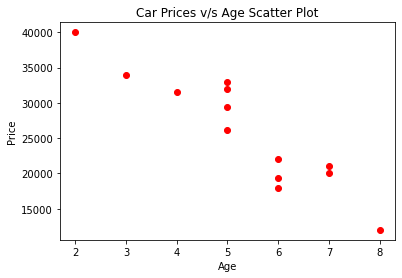

In [55]:
%matplotlib inline
plt.scatter(df['Age'], df['Price'],color='red')
plt.title('Car Prices v/s Age Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

In [56]:
dummies=pd.get_dummies(df.Model)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [57]:
merged_df=pd.concat([df,dummies],axis='columns')
merged_df

,Model,Mileage,Price,Age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [58]:
final_df=merged_df.drop(['Model','Mercedez Benz C class'],axis='columns')
final_df

,Mileage,Price,Age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [59]:
reg=LinearRegression()

In [60]:
x=final_df.drop(['Price'],axis='columns')
x

,Mileage,Age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [61]:
y=final_df.Price

In [62]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Price, dtype: int64

In [63]:
reg.fit(x,y)

LinearRegression()

In [64]:
reg.predict([[22500,2,0,1]])

array([41245.76426391])

In [65]:
reg.predict([[79000,7,0,1]])

array([13671.59779291])

In [66]:
reg.predict(x)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [67]:
reg.score(x,y)

0.9417050937281083

In [100]:
def pred():
    a=float(input('Enter Mileage : '))
    b=float(input('Enter Age : '))
    c=float(input('Enter 1 for Adi A5 else 0 : '))
    d=float(input('Enter 1 for BMW X5 else 0 : '))
    print('The Estimated price is',reg.predict([[a,b,c,d]]))
    

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

In [101]:
pred()

Enter Mileage : 45000
Enter Age : 4
Enter 1 for Adi A5 else 0 : 0
Enter 1 for BMW X5 else 0 : 0
The Estimated price is [36991.31721061]


**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

In [102]:
pred()

Enter Mileage : 86000
Enter Age : 7
Enter 1 for Adi A5 else 0 : 0
Enter 1 for BMW X5 else 0 : 1
The Estimated price is [11080.74313219]


In [96]:
import pickle

In [97]:
with open('Ohe_model','wb') as f:
    pickle.dump(reg,f)

In [98]:
with open('Ohe_model','rb') as f:
    r=pickle.load(f)

In [99]:
r.predict([[86000,7,0,1]])

array([11080.74313219])